In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
from joblib import Parallel, delayed
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

warnings.filterwarnings('ignore')

In [5]:
train_df = pd.read_csv("C:/Users/dhanu/OneDrive/train.csv")
test_df = pd.read_csv("C:/Users/dhanu/OneDrive/test.csv")

# Display the first few rows of the datasets
train_df.head(), test_df.head()

(                      ID        date     Item Id  \
 0  2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
 1  2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
 2  2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
 3  2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
 4  2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   
 
                                            Item Name  ad_spend anarix_id  \
 0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
 1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
 2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
 3        NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
 4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
 
    units  unit_price  
 0    0.0         0.0  
 1    0.0         0.0  
 2    0.0         0.0  
 3    0.0         0.0  
 4    0.0         0.0  ,
                       ID        date     Item Id  \
 0  2024-07-01_B09

In [7]:
#EDA-Exploratory Data Analysis

# Checking for missing values in the training dataset
missing_values_train = train_df.isnull().sum()

# Summary statistics of the training dataset
summary_statistics_train = train_df.describe(include='all')

# Checking the data types of each column in the training dataset
data_types_train = train_df.dtypes

print(missing_values_train)
print(summary_statistics_train)
print(data_types_train)


ID                0
date              0
Item Id           2
Item Name      1832
ad_spend      24187
anarix_id         0
units         17898
unit_price        0
dtype: int64
                           ID        date     Item Id  \
count                  101490      101490      101488   
unique                 101490         781         217   
top     2022-04-12_B09KDTS4DC  2023-03-09  B09MR2FY5D   
freq                        1         189         781   
mean                      NaN         NaN         NaN   
std                       NaN         NaN         NaN   
min                       NaN         NaN         NaN   
25%                       NaN         NaN         NaN   
50%                       NaN         NaN         NaN   
75%                       NaN         NaN         NaN   
max                       NaN         NaN         NaN   

                                                Item Name      ad_spend  \
count                                               99658  77303.00

In [9]:
# Handle missing values in 'units' by filling with 0
train_df['units'].fillna(0, inplace=True)

# Replace negative values in 'units' with NaN and then fill with 0
train_df.loc[train_df['units'] < 0, 'units'] = None
train_df['units'].fillna(0, inplace=True)

# Replace negative values in 'unit_price' with absolute values
train_df['unit_price'] = train_df['unit_price'].abs()

# Convert 'date' column to datetime format and create new features
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['day_of_week'] = train_df['date'].dt.dayofweek

# Convert 'date' column to datetime format and create new features in the test set
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['day_of_week'] = test_df['date'].dt.dayofweek

print(test_df.head())
print(train_df.head())

                      ID       date     Item Id  \
0  2024-07-01_B09KDR64LT 2024-07-01  B09KDR64LT   
1  2024-07-01_B09KDTS4DC 2024-07-01  B09KDTS4DC   
2  2024-07-01_B09KDTHJ6V 2024-07-01  B09KDTHJ6V   
3  2024-07-01_B09KDQ2BWY 2024-07-01  B09KDQ2BWY   
4  2024-07-01_B09KDYY3SB 2024-07-01  B09KDYY3SB   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 10" Gel Memory Foam Mattres...       NaN  NAPQUEEN   
1  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
2  NapQueen Elizabeth 12" Gel Memory Foam Mattres...       NaN  NAPQUEEN   
3  NapQueen Elizabeth 12" Gel Memory Foam Mattres...       NaN  NAPQUEEN   
4  NapQueen Elizabeth 10" Gel Memory Foam Mattres...    101.72  NAPQUEEN   

   unit_price  year  month  day  day_of_week  
0         0.0  2024      7    1            0  
1         0.0  2024      7    1            0  
2         0.0  2024      7    1            0  
3         0.0  2024      7    1            0  
4

In [11]:
item_id = 'B09KDTS4DC'  # Replace with the Item Id you want to visualize

# Filter the data for the selected Item Id
item_train_df = train_df[train_df['Item Id'] == item_id]
item_test_df = test_df[test_df['Item Id'] == item_id]


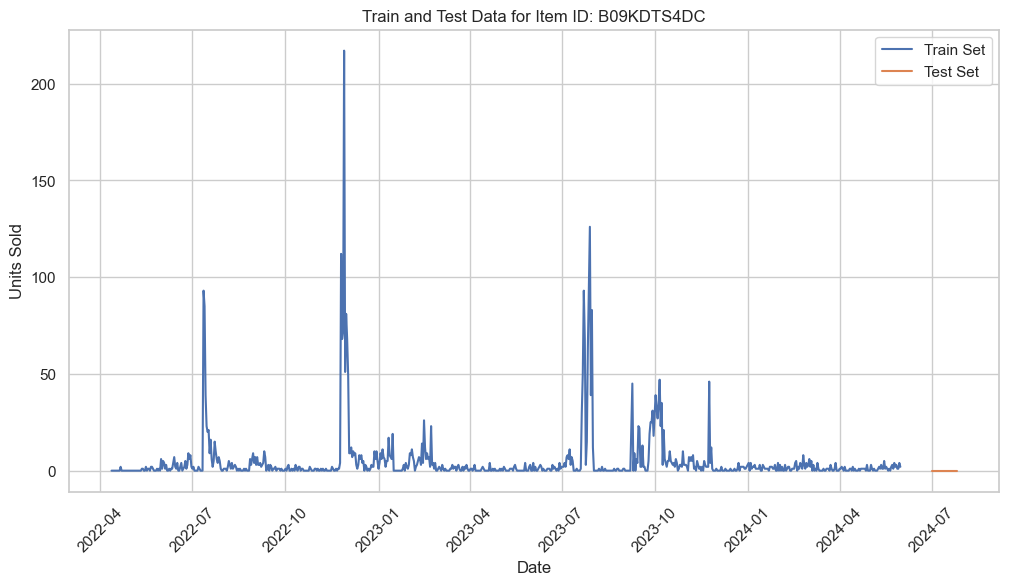

In [13]:
# Ensure that the date columns are in datetime format
item_train_df['date'] = pd.to_datetime(item_train_df['date'])
item_test_df['date'] = pd.to_datetime(item_test_df['date'])

# Plotting train and test data separately
plt.figure(figsize=(12, 6))
plt.plot(item_train_df['date'], item_train_df['units'], label='Train Set')
plt.plot(item_test_df['date'], item_test_df['unit_price'], label='Test Set')
plt.title(f'Train and Test Data for Item ID: {item_id}')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [14]:
# Group data by 'Item Id' and 'date' for time series analysis
item_sales = train_df.groupby(['date', 'Item Id']).agg({'units': 'sum'}).reset_index()

# Pivot table to create a time series for each item
time_series_data = item_sales.pivot(index='date', columns='Item Id', values='units')

# Initialize dictionary to store ARIMA predictions
arima_predictions = {}


In [17]:
# Convert 'date' to datetime if it's not already
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Extract date features
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['day_of_week'] = train_df['date'].dt.dayofweek

test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['day_of_week'] = test_df['date'].dt.dayofweek


In [19]:
# Create lag features for the 'units' column
lag_days = [1, 7, 14]  # Example lags: 1 day, 1 week, 2 weeks

for lag in lag_days:
    train_df[f'units_lag_{lag}'] = train_df.groupby('Item Id')['units'].shift(lag)
    test_df[f'units_lag_{lag}'] = test_df.groupby('Item Id')['unit_price'].shift(lag)


In [21]:
# Create rolling window features for the 'units' column
window_sizes = [3, 7, 14]  # Example windows: 3 days, 1 week, 2 weeks

for window in window_sizes:
    train_df[f'units_roll_mean_{window}'] = train_df.groupby('Item Id')['units'].rolling(window=window).mean().reset_index(level=0, drop=True)
    test_df[f'units_roll_mean_{window}'] = test_df.groupby('Item Id')['unit_price'].rolling(window=window).mean().reset_index(level=0, drop=True)


In [23]:
# Interaction between ad spend and units
train_df['ad_spend_units'] = train_df['ad_spend'] * train_df['units']
test_df['ad_spend_units'] = test_df['ad_spend'] * test_df['unit_price']


In [25]:
# Fill NaN values after creating lag and rolling features
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)


In [27]:
# Display the first few rows to check the new features
print(train_df.head())
print(test_df.head())


                      ID       date     Item Id  \
0  2022-04-12_B09KDTS4DC 2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH 2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R 2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY 2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ 2022-04-12  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...       0.0  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       0.0  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL       0.0  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin       0.0  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL       0.0  NAPQUEEN   

   units  unit_price  year  month  day  day_of_week  units_lag_1  units_lag_7  \
0    0.0         0.0  2022      4   12            1          0.0          0.0   
1    0.0         0.0  2022      4   12            1          0.0          

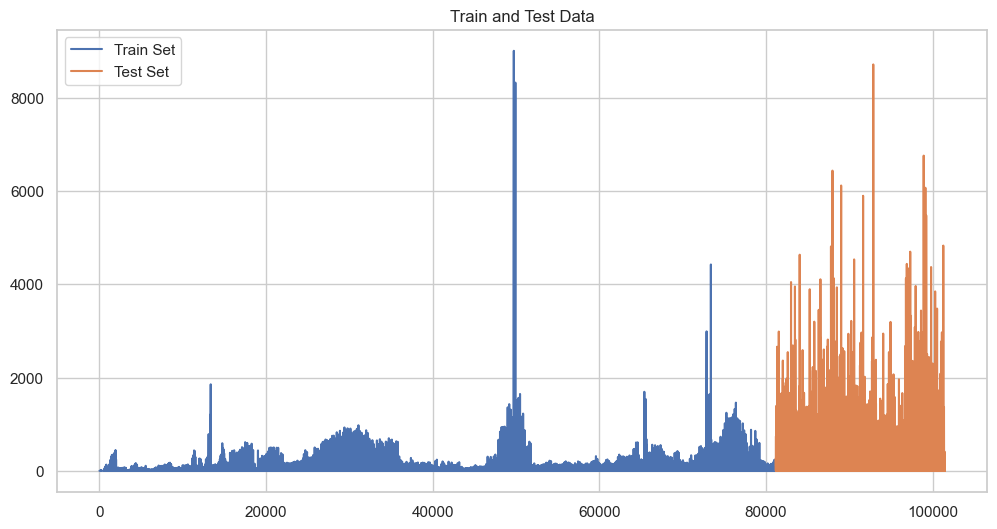

In [29]:
# Assuming `data` is already loaded and combined as shown in the previous EDA steps
train_size = int(len(train_df) * 0.8)
train, test = train_df.iloc[:train_size], train_df.iloc[train_size:]

# Plot the train and test sets
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['units'], label='Train Set')
plt.plot(test.index, test['unit_price'], label='Test Set')
plt.legend()
plt.title('Train and Test Data')
plt.show()


In [37]:
def fit_arima_model(item_id, item_series):
    # Ensure that the series has enough data points
    if len(item_series) < 30:  # Adjust the threshold as necessary
        print(f'Item ID: {item_id} has too few data points, skipping...')
        return item_id, None, None

    # Split the data into training and testing sets (80-20 split)
    train_size = int(len(item_series) * 0.8)
    train_data, test_data = item_series[:train_size], item_series[train_size:]

    # Automatically select the best ARIMA model using auto_arima
    try:
        model = auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True,
                           error_action='ignore', trace=False)
        model_fit = model.fit(train_data)

        # Forecast the future values
        forecast = model_fit.predict(n_periods=len(test_data))

        # Calculate MSE for the forecast
        mse = mean_squared_error(test_data, forecast)
        print(f'Item ID: {item_id}, Best ARIMA Order: {model.order}, MSE: {mse}')

        return item_id, forecast, mse

    except Exception as e:
        print(f'Item ID: {item_id} encountered an error: {e}')
        return item_id, None, None


C:\Users\dhanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dhanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dhanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dhanu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


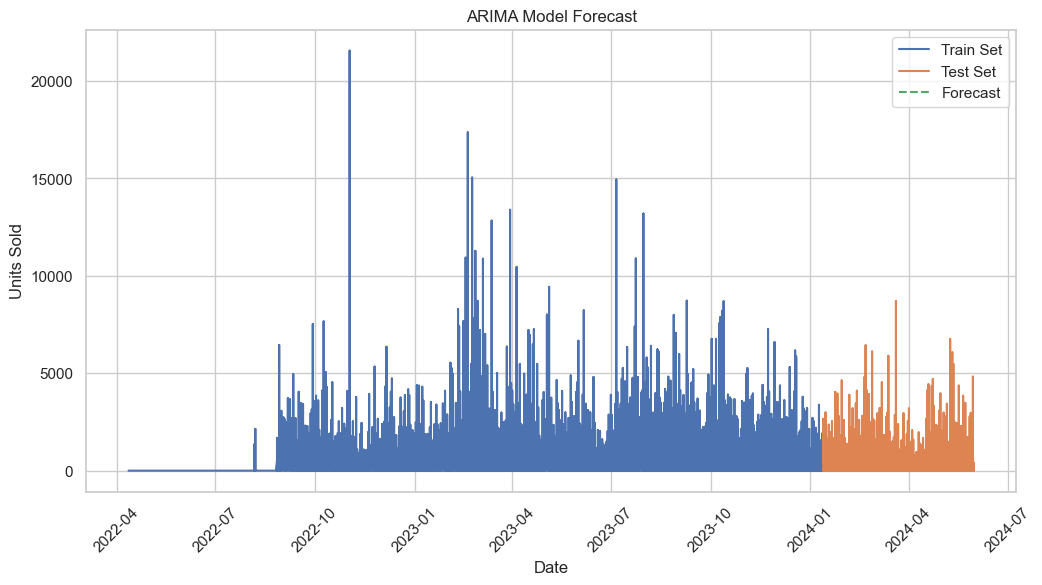

Mean Squared Error: 111288.14


In [41]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Select the target column
target_column = 'unit_price'
train_data = train_df.set_index('date')[target_column]
test_data = test_df.set_index('date')[target_column]

# Split the data (assuming 'date' is the index)
train_size = int(len(train_data) * 0.8)
train_set, test_set = train_data[:train_size], train_data[train_size:]

# Define the ARIMA model parameters (p, d, q) - replace with your best parameters
p, d, q = 1, 1, 1  # Example values, adjust according to your model selection
arima_model = ARIMA(train_set, order=(p, d, q))

# Fit the ARIMA model
arima_model_fit = arima_model.fit()



# Make predictions on the test set
forecast_steps = len(test_set)
forecast = arima_model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecast
forecast_index = test_set.index
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_set.index, train_set, label='Train Set')
plt.plot(test_set.index, test_set, label='Test Set')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='--')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

# Calculate and print the Mean Squared Error (MSE) of the forecast
mse = mean_squared_error(test_set, forecast)
print(f'Mean Squared Error: {mse:.2f}')
